# Анализ успешности игр для интернет-магазина "Стримчик"

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. Сейчас декабрь 2016 г., и нужно спланировать кампанию на 2017-й. Требуется отработать принцип работы с данными.

В наборе данных присутствует аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Задачи***:

- Выяснить сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Узнать как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Велика ли разница в продажах? А в средних продажах на разных платформах?
- Узнать как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Соотнести выводы с продажами игр на других платформах.
- Проанализировать общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

***Определить для пользователя каждого региона (NA, EU, JP):***

- Самые популярные платформы (топ-5). Каковы различия в долях продаж?
- Самые популярные жанры (топ-5). В чем разница?
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

***Проверить гипотезы:***

- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
- "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные"

##### Описание данных

- Name - название игры
- Platform - платформа
- Year_of_Release - год выпуска
- Genre - жанр игры
- NA_sales - продажи в Северной Америке (миллионы долларов)
- EU_sales - продажи в Европе (миллионы долларов)
- JP_sales - продажи в Японии (миллионы долларов)
- Other_sales - продажи в других странах (миллионы долларов)
- Critic_Score - оценка критиков (максимум 100)
- User_Score - оценка пользователей (максимум 10)
- Raiting - рейтинг от организации ERSB(англ. Entertainment Software Raiting Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Открываем и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
games = pd.read_csv('dataset/games.csv', index_col=0)

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### 2. Подготовка данных

Изменим регистр названия столбцов:

In [5]:
games.columns=games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


***Столбец 'name':***

Здесь пропущены два элемента:

In [6]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки содержат большое количество пропусков. Объем этих данных составляет ~0.01% от всего датасета. Удалим эти строчки.

In [7]:
games.drop(games[games['name'].isna()].index, axis=0, inplace=True)
games = games.reset_index()
del games['index']

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Столбец 'platform':***

In [9]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Подозрительных названий платформ не обнаруживается.

***Столбец 'year_of_release':***

In [10]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Процент записей с пропущенным годом ~1.6% от всего датафрейма. Удалим эти записи тоже.

In [11]:
games.drop(games[games['year_of_release'].isnull()].index, axis=0, inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)
games = games.reset_index()
del games['index']

Изменили тип даных на целочисленный, так как существуют только целочисленные годы.

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


***Столбец 'genre':***

In [13]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Аномальных значений не наблюдается.

***Столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales':***

Создадим временную переменную sales для читаемости:

In [14]:
sales = games.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
sales.describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


По всем показателям наблюдается ассиметрия с правым "хвостом". Так же стоит отметить большой разброс значений.

In [15]:
sales.sample(5)

,na_sales,eu_sales,jp_sales,other_sales
3414,0.33,0.22,0.00,0.03
1809,0.00,1.12,0.00,0.00
16011,0.01,0.00,0.00,0.00
1510,0.74,0.05,0.43,0.07
6194,0.00,0.00,0.27,0.00


Так же стоит отметить большое количество нулевых значений продаж.

Узнаем их количество и процент от общего количества:

In [16]:
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(col,' = ',sales[sales[col] == 0][col].count(), ' -> ', (sales[sales[col] == 0][col].count()/len(sales)*100).round(2), '%', sep='')

na_sales = 4449 -> 27.06%
eu_sales = 5766 -> 35.06%
jp_sales = 10300 -> 62.64%
other_sales = 6492 -> 39.48%


Удалим временную переменную, чтобы избежать возможных ошибок.

In [17]:
del sales

Выясним, в каких строках встречаются нулевые значения по всем четырем столбцам:

In [18]:
games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Это составляет ~0.01% от общего датасета и не несет необходимой для исследований информации. Удалим.

In [19]:
games.drop(games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0').index, axis=0, inplace=True)

In [20]:
games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Полностью нулевых значений по всем четырем столбцам с продажами не осталось. В остальных случаях суммирование покажет суммарный объем продаж.

***Столбец 'critic_score':***

In [21]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

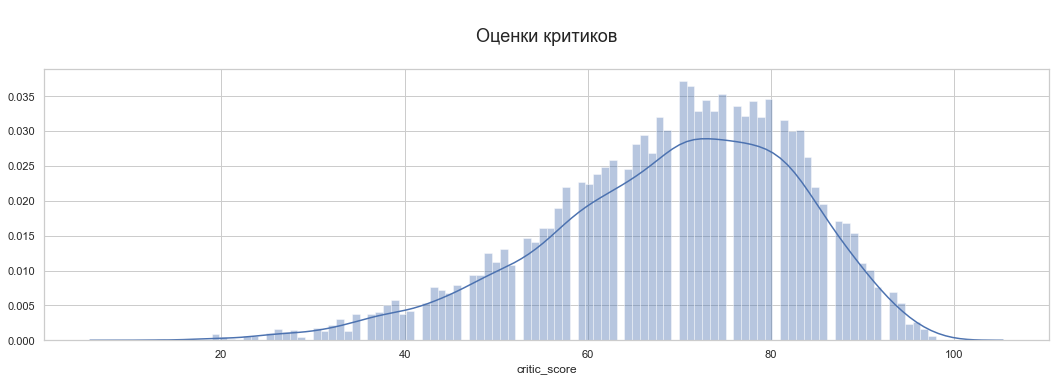

In [22]:
cr = sns.distplot(games['critic_score'].dropna(), hist=True, bins=100)
cr.set_title('\nОценки критиков\n', fontsize=18)
cr.figure.set_size_inches(18, 5)

Проигнорированы значения NaN. На распределении наблюдается небольшая ассиметрия с левым "хвостом". 

Поскольку нулевой оценки в данном датасете не бывает значения NaN заменим на нулевые - это позволит преобразовать все оценки в целочисленный вид.

In [23]:
games['critic_score'] = games['critic_score'].fillna(0).astype(int)

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


***Столбец 'user_score':***

Этот столбец требует преобразования в числовой тип. Для этого сначала нужно разобраться с 'Nan' и 'tbd'.

In [25]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - это аббреавиатура 'to be determined', обычно принято, что такую отметку ставят, когда очень мало поставивших оценки. Посмотрим на эти записи.

In [26]:
games.query('user_score == "tbd"').sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11875,futureU: The Prep Game for SAT,DS,2008,Misc,0.06,0.00,0.0,0.01,0,tbd,E
9129,Travel Games For Dummies,DS,2008,Misc,0.12,0.00,0.0,0.01,62,tbd,E
7549,Backyard Hockey,GBA,2003,Sports,0.14,0.05,0.0,0.00,0,tbd,E
12292,Imagine: Gymnast,DS,2008,Simulation,0.05,0.01,0.0,0.00,0,tbd,E
12859,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.00,0.0,0.00,0,tbd,EC


Поскольку tdb - это не определенное значение присвоим ему значение NaN.

In [27]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [28]:
games.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2797,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,0,0.0,E


P.S. К этой игре на metacritic есть два комментария с негативным отзывами - пользователи считают, что рейтинг нулевой, потому что никто не слышал об этой игре, ругают сюжет, упавление в игре". Пользовательский рейтинг игры "0". Это единственная игра в нашем датасете с нулевым рейтингом.

Остальные оценки оставим без изменений, поскольку по всей видимости игры не были оценены пользователями.

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


***Столбец 'raiting':***

In [30]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
games['rating'].isna().sum()

6674

In [32]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

---

***Категории ESRB (выставляются с 1994 года):***
- EC - Early Childhood (для дошкольной аудитории, был отменен в 2018 году)
- Е - Everyone
- K-A - Kids to Aduilts (просуществовал до 1998 года, а затем его переименовали в "Everyone")
- E10+ - Everyone 10+ (существует с марта 2005 года)
- T - Teen (подходит для детей от 13 лет и старше)
- M - Mature 17+
- AO - Adults Only +18
- RP - Rating Pending (встречается в промоматериалах для игр, которые еще не получили итоговый рейтинг)

---

In [33]:
games.query('year_of_release < 1994 and rating.notna()', engine='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2575,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,0,NaN,T
14241,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59,5.8,T
14379,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85,8.2,M
14390,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64,2.2,E10+


Есть игры до 1994 года, которые тоже имеют рейтинг от ESRB.

In [34]:
games[games['rating'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2606,Andretti Racing,PS,1996,Racing,0.43,0.29,0.00,0.05,0,NaN,NaN
2045,PES 2009: Pro Evolution Soccer,X360,2008,Sports,0.13,0.76,0.03,0.09,0,NaN,NaN
7509,Ashes Cricket 2009,X360,2009,Sports,0.00,0.19,0.00,0.01,0,NaN,NaN
15891,Samurai Shodown Anthology (JP sales),PS2,2008,Fighting,0.00,0.00,0.01,0.00,0,NaN,NaN
15137,Tsuyo Kiss 2 Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0,NaN,NaN


При этом некоторым играм рейтинг никогда не давался, а у некоторых игр рейтиг присвоен, но в данном датасете отражен как пропуск. Например, игра PhotoKano (2012) имеет рейтинг 'E'. А игре NBA In The Zone '98 (1997) был присвоен рейтинг 'K-A', который затем изменили на 'E'.

*Источник:* https://www.mobygames.com/attribute/sheet/attributeId,91/p,9/

In [35]:
print(((games['rating'].isna().sum())/len(games)*100).round(2),'%')

40.59 %


Избавление от неопределенных значений нанесет серьезный урон, поэтому просто оставим значения без изменений. 

P.S. вероятно некоторые игры имеют рейтинг в системе PEGI или другой.

***Создадим столбец 'sales_total' - суммарные продажи во всех регионах в (млн. долларов) :***

In [36]:
games['sales_total'] = games.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN,31.38


### 3. Исследовательский анализ данных

***Посмотрим за какой характерный срок исчезают платформы:***

In [37]:
live_list = []
sum = 0
for pl in games['platform'].unique():
    max = games[games['platform'] == pl]['year_of_release'].max()
    min = games[games['platform'] == pl]['year_of_release'].min()
    live_list.append([max-min, f'{pl} : {max} - {min} = {max-min} лет'])
live_list.sort(reverse=True)
for l in live_list:
    print(l[1])
for el in range(len(live_list)):
    sum += live_list[el][0]
print('\nmean =', round(sum/len(live_list)), 'лет')

PC : 2016 - 1985 = 31 лет
DS : 2013 - 1985 = 28 лет
GB : 2001 - 1988 = 13 лет
X360 : 2016 - 2005 = 11 лет
PSP : 2015 - 2004 = 11 лет
PS2 : 2011 - 2000 = 11 лет
NES : 1994 - 1983 = 11 лет
Wii : 2016 - 2006 = 10 лет
PS3 : 2016 - 2006 = 10 лет
DC : 2008 - 1998 = 10 лет
SNES : 1999 - 1990 = 9 лет
PS : 2003 - 1994 = 9 лет
2600 : 1989 - 1980 = 9 лет
XB : 2008 - 2000 = 8 лет
GBA : 2007 - 2000 = 7 лет
N64 : 2002 - 1996 = 6 лет
GC : 2007 - 2001 = 6 лет
SAT : 1999 - 1994 = 5 лет
PSV : 2016 - 2011 = 5 лет
3DS : 2016 - 2011 = 5 лет
WiiU : 2016 - 2012 = 4 лет
GEN : 1994 - 1990 = 4 лет
XOne : 2016 - 2013 = 3 лет
PS4 : 2016 - 2013 = 3 лет
NG : 1996 - 1993 = 3 лет
WS : 2001 - 1999 = 2 лет
SCD : 1994 - 1993 = 1 лет
3DO : 1995 - 1994 = 1 лет
TG16 : 1995 - 1995 = 0 лет
PCFX : 1996 - 1996 = 0 лет
GG : 1992 - 1992 = 0 лет

mean = 8 лет


*Приходим к выводу что платформа существует на рынке в среднем 8 лет. Учтем это наблюдение при формировании* ***актуального периода***.

***Определим актуальные на 2016 год платформы:***

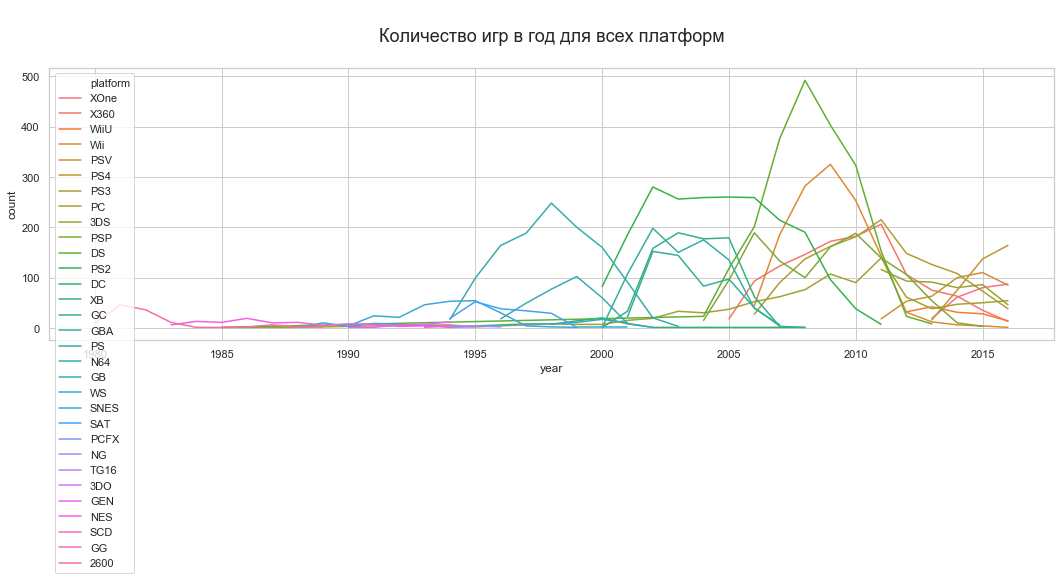

In [38]:
platform_by_year = games.pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').sort_values(by='year_of_release', ascending=False).reset_index()
platform_by_year.columns = ['year', 'platform', 'count']

pby = sns.lineplot(x="year", y="count",
             hue="platform",
             data=platform_by_year, legend='full')
pby.set_title('\nКоличество игр в год для всех платформ\n', fontsize=18)
pby.figure.set_size_inches(18, 5)

По линейной диаграмме видно, что платформы в разные годы набирали обороты, а затем теряли актуальность и игры для них совсем переставали выпускаться. За **актуальный период** наиболее логичным будет взять платформы, имеющие актуальность на сегодняшний день.

- Посмотрим для каких платформ были выпущены игры в 2016 году:

In [39]:
actual_platform = games.query('year_of_release == 2016')['platform'].unique()
actual_list = np.sort(actual_platform)
actual_list

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

- Ограничим датасет по актуальным платформам:

In [40]:
actual_games = games[games['platform'].isin(actual_list)]
np.sort(actual_games['platform'].unique())

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

***Как менялись продажи по платформам?***

- Оценим продажи по всем актуальным платформам:

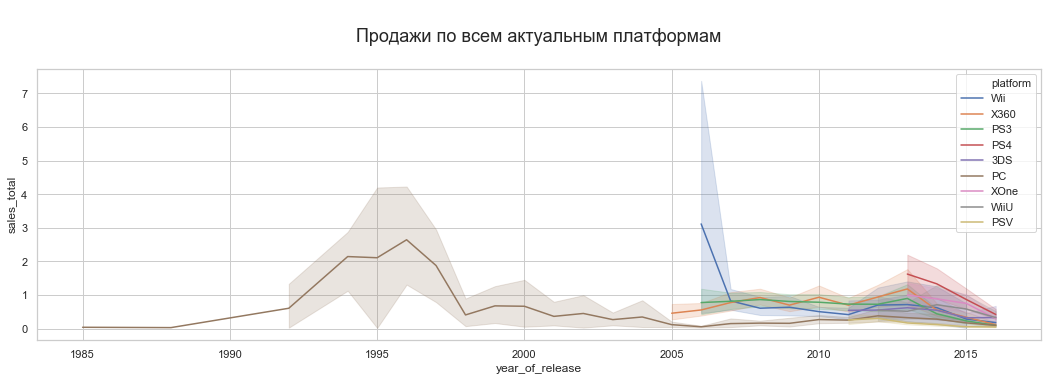

In [41]:
pts = sns.lineplot(x="year_of_release", y="sales_total",
             hue="platform",
             data=actual_games)
pts.set_title('\nПродажи по всем актуальным платформам\n', fontsize=18)
pts.figure.set_size_inches(18, 5)

- Ограничим датасет с учетом средней "выжываемости" платформы на рынке в 8 лет (*2016 - 8 = 2008 год*) и установим актуальный период для дальнейших исследований:

In [42]:
actual_games = actual_games.query('year_of_release >= 2008')

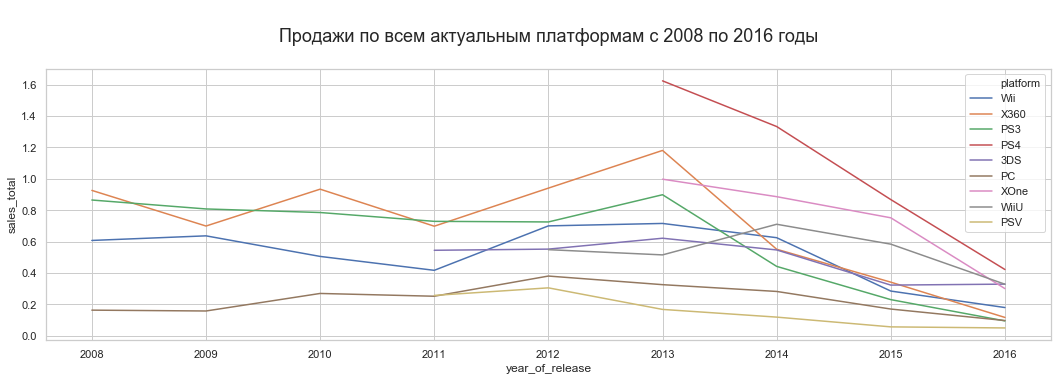

In [43]:
pts1 = sns.lineplot(x="year_of_release", y="sales_total",
             hue="platform",
             data=actual_games, ci=None)
pts1.set_title('\nПродажи по всем актуальным платформам c 2008 по 2016 годы\n', fontsize=18)
pts1.figure.set_size_inches(18, 5)

***Какие платформы лидируют по продажам?***

В целом наблюдается упадок по продажам на всех платформах. 
- В лидерах плаформы PS4, XOne, WiiU, но при этом резко снижаются
- Упав к 2015 снова набирает обороты и стремится в лидеры платформа 3DS
- PC стабильно качается то в большую то в меньшую сторону и периодически до обретает то теряет интерес, но уже 31 год (исходя из датасета), это определяется абсолютной мультизадачностью системы (устоявшаяся группа поклонников PC, это, предположительно, люди, которые используют компьютер для учебы, работы и его же используют как платформу для игр - бюджетно, поэтому и спрос долгосрочный, но стабильно не высокий). Сейчас наблюдается очередное ослабление интереса к играм на PC.
- В самом низу платформа PSV, которая испытывает легкое оживление к 2016 году, но в целом, согласно предположительному циклу в 8 лет, платформа должна потерять большинство поклонников к 2019 году.

**P.S.** *3 марта 2019* "Sony ушла с рынка портативных консолей: производство PS Vita прекращено..." *источник: https://3dnews.ru/983693*

***Какова разница в глобальных продажах на каждую актуальную платформу? Велика ли разница в продажах?***

Отсечем выбросы сверху, для того чтобы нагляднее взглянуть на межквартильный размах и медиану.

In [44]:
actual_games['sales_total'].describe()

count    5632.000000
mean        0.579363
std         1.504256
min         0.010000
25%         0.060000
50%         0.180000
75%         0.530000
max        35.520000
Name: sales_total, dtype: float64

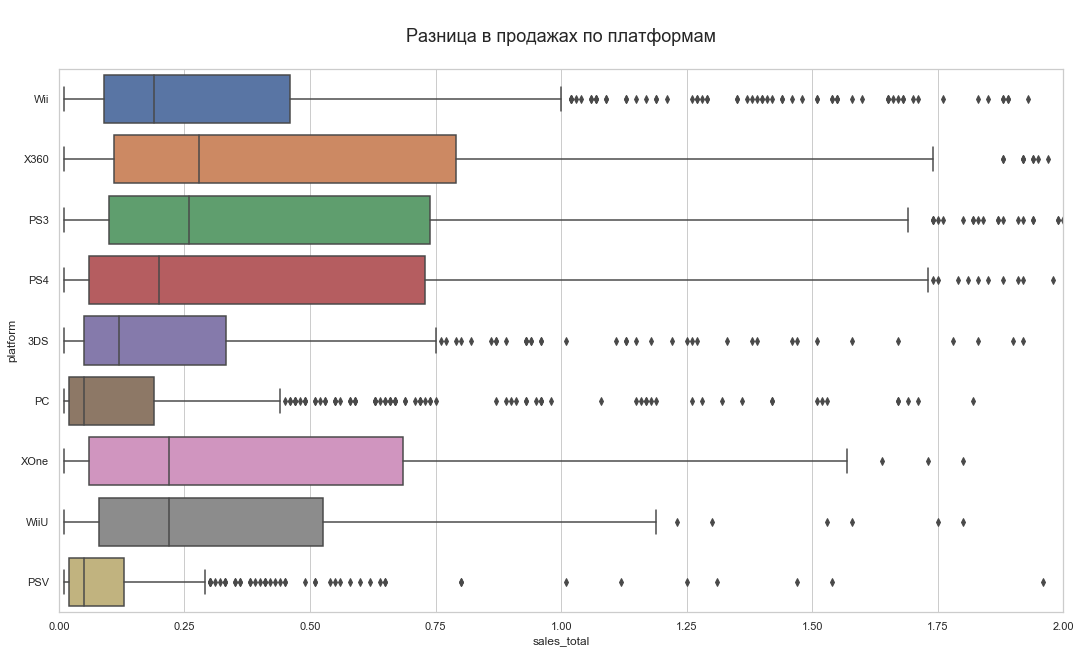

In [45]:
spwp = sns.boxplot(data=actual_games, x='sales_total', y='platform')
spwp.set(xlim=(0,2))
spwp.set_title('\nРазница в продажах по платформам\n', fontsize=18)
spwp.figure.set_size_inches(18, 10)

Лидерами по межквартильным показателям являются конкурентные пары X360 - PS3 и XOne - PS4. При этом удивительно, что пара предыдущего поколения (X360-PS3) по медианным показателям превосходят пару нынешнего поколения (XOne - PS4). Так же заметна тендеция что по медианным показателям Microsoft (X360 и XOne) немного первышает Sony (PS3 и PS4).

Отметим так же Nintendo (Wii и WiiU), они отличаются чуть более узким межквартильным размахом. По медианному показателю консоль WiiU совсем не уступает XOne, что подтверждает факт, что Nintendo является сейчас серьезным конкурентом Microsoft и Sony.

***Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?***

Определим влияние оценок критиков на продажи по каждой платформе:

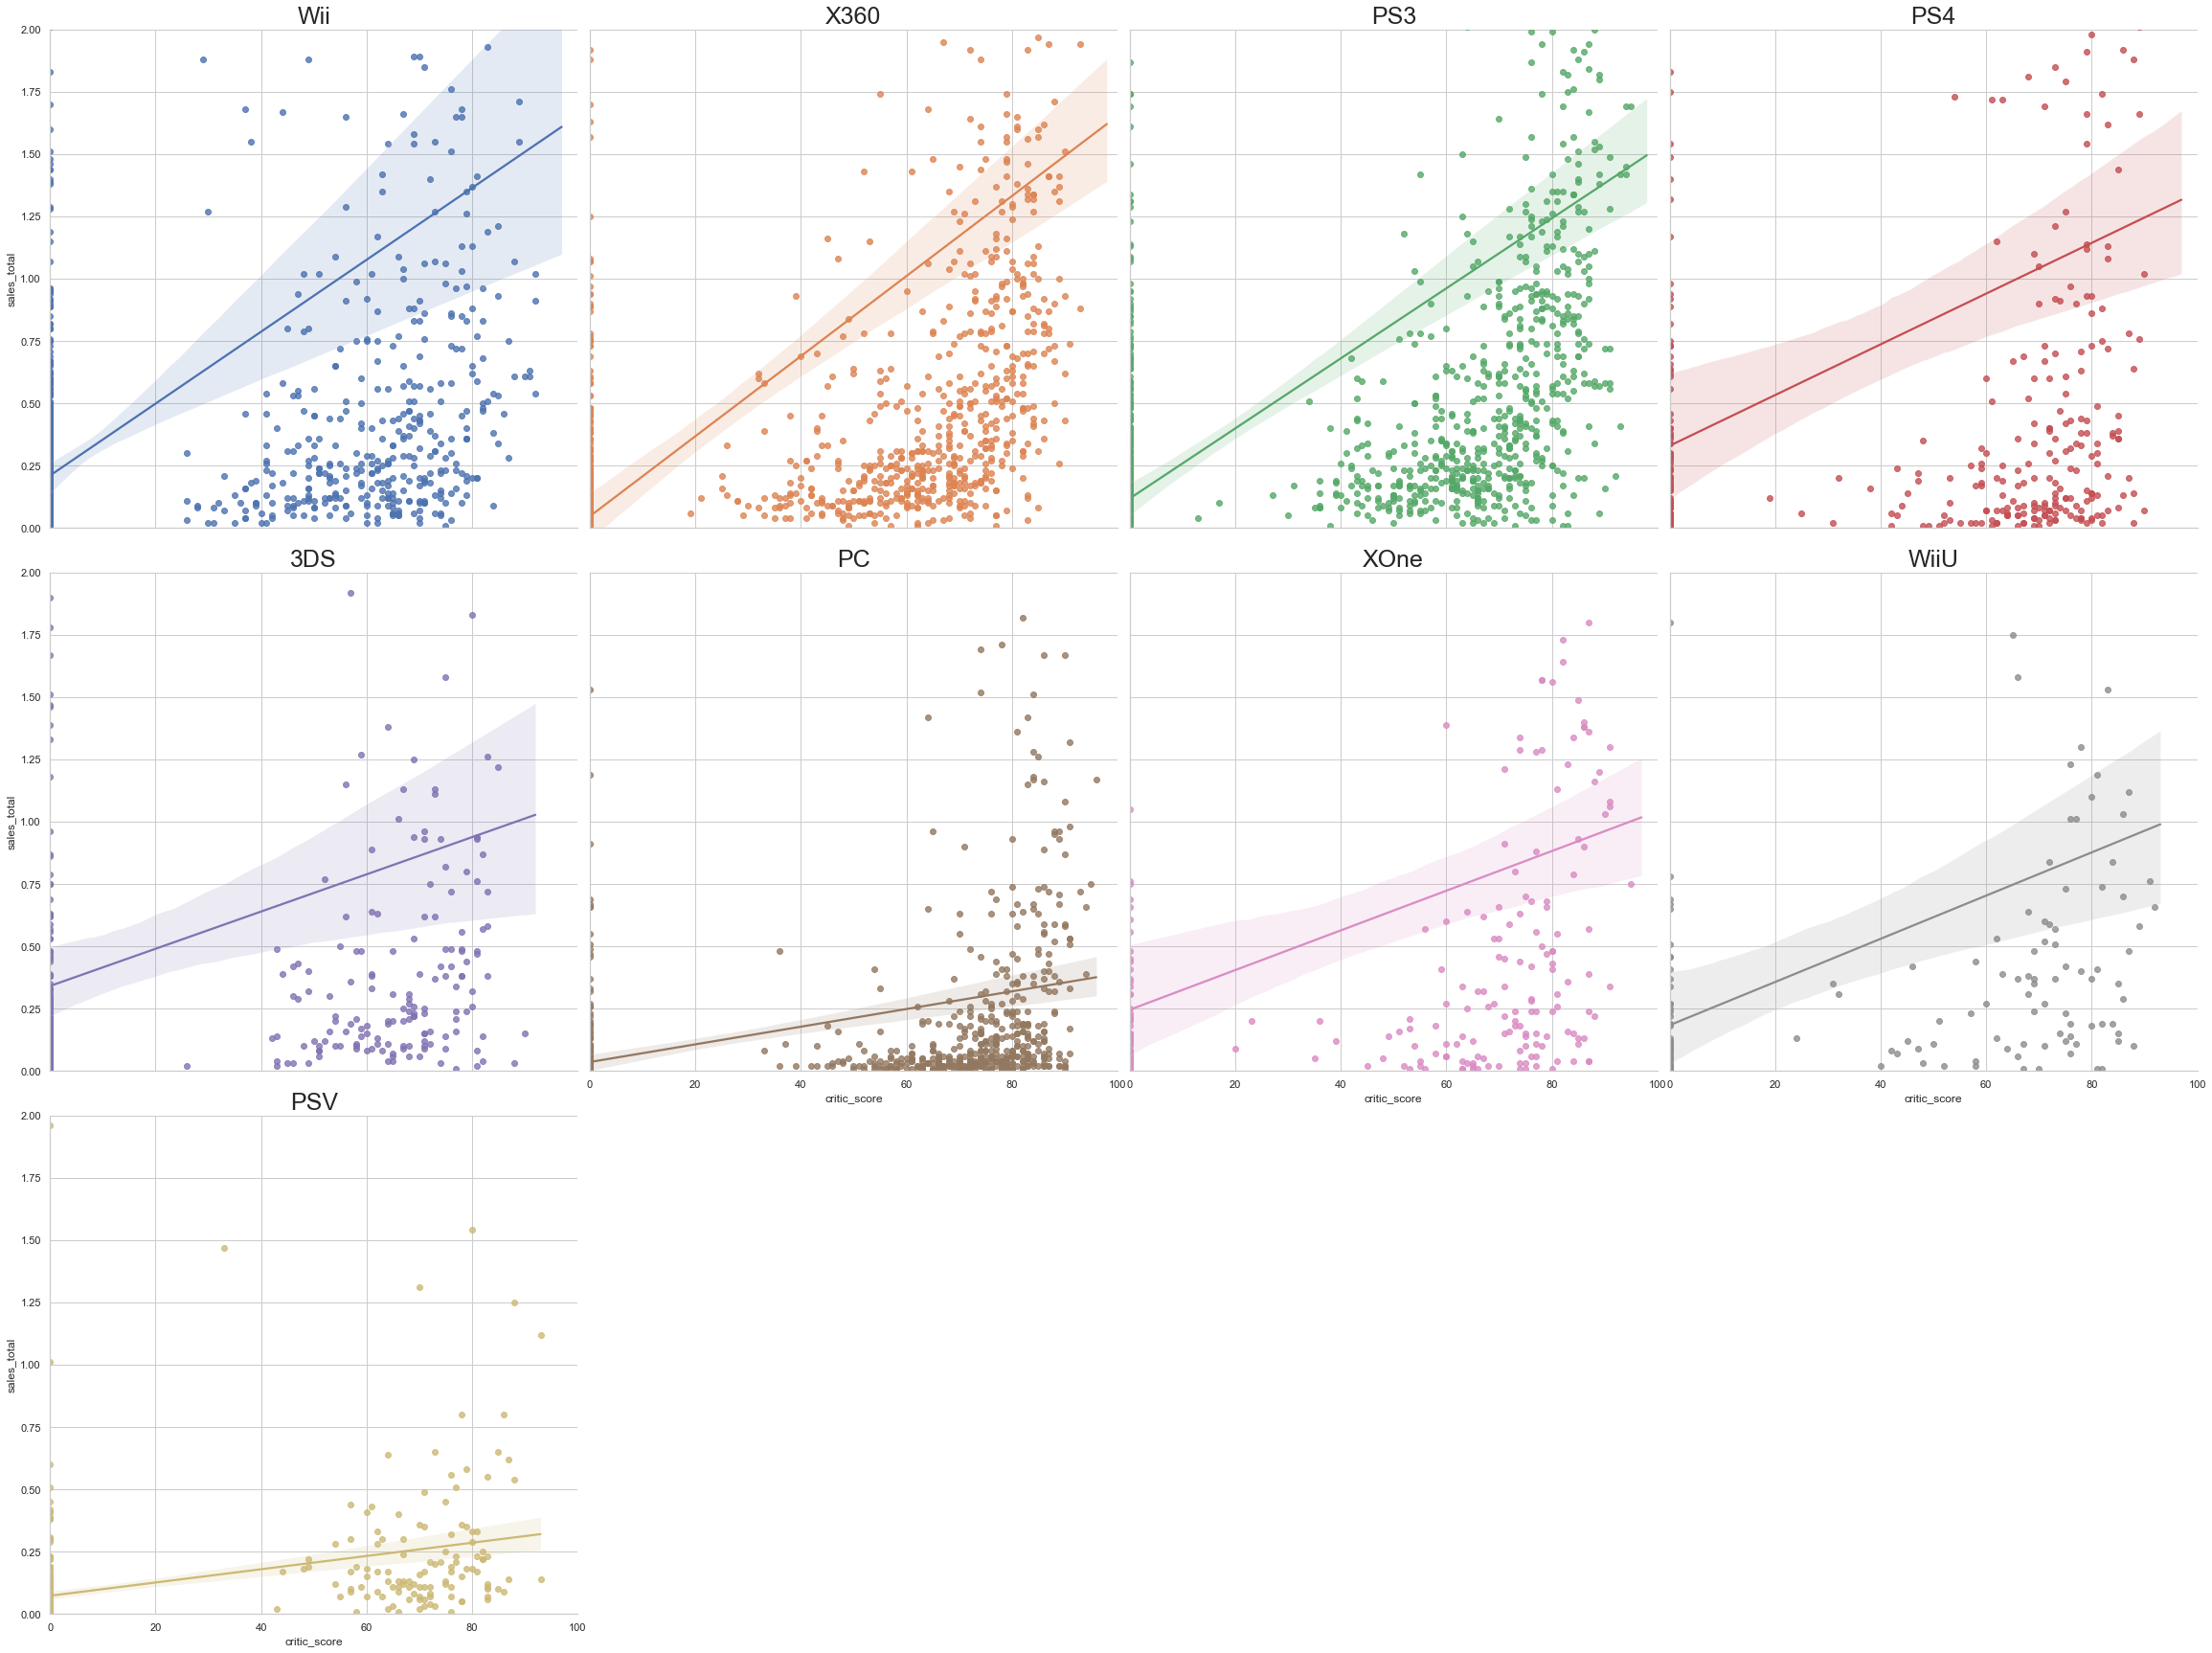

In [46]:
xog = sns.lmplot(data=actual_games, x='critic_score', y='sales_total', col='platform',
                 hue='platform', col_wrap=4, height=8).set(xlim=(0,100),ylim=(0,2)).set_titles("{col_name}", size=25)

- По графикам видно, что пользователи изучаемымых платформ обращают внимание на оценку критиков. Отмечается прямая зависимость: чем выше оценка критиков тем больше игру покупают.

Определим влияние оценок пользователей на продажи по каждой платформе:

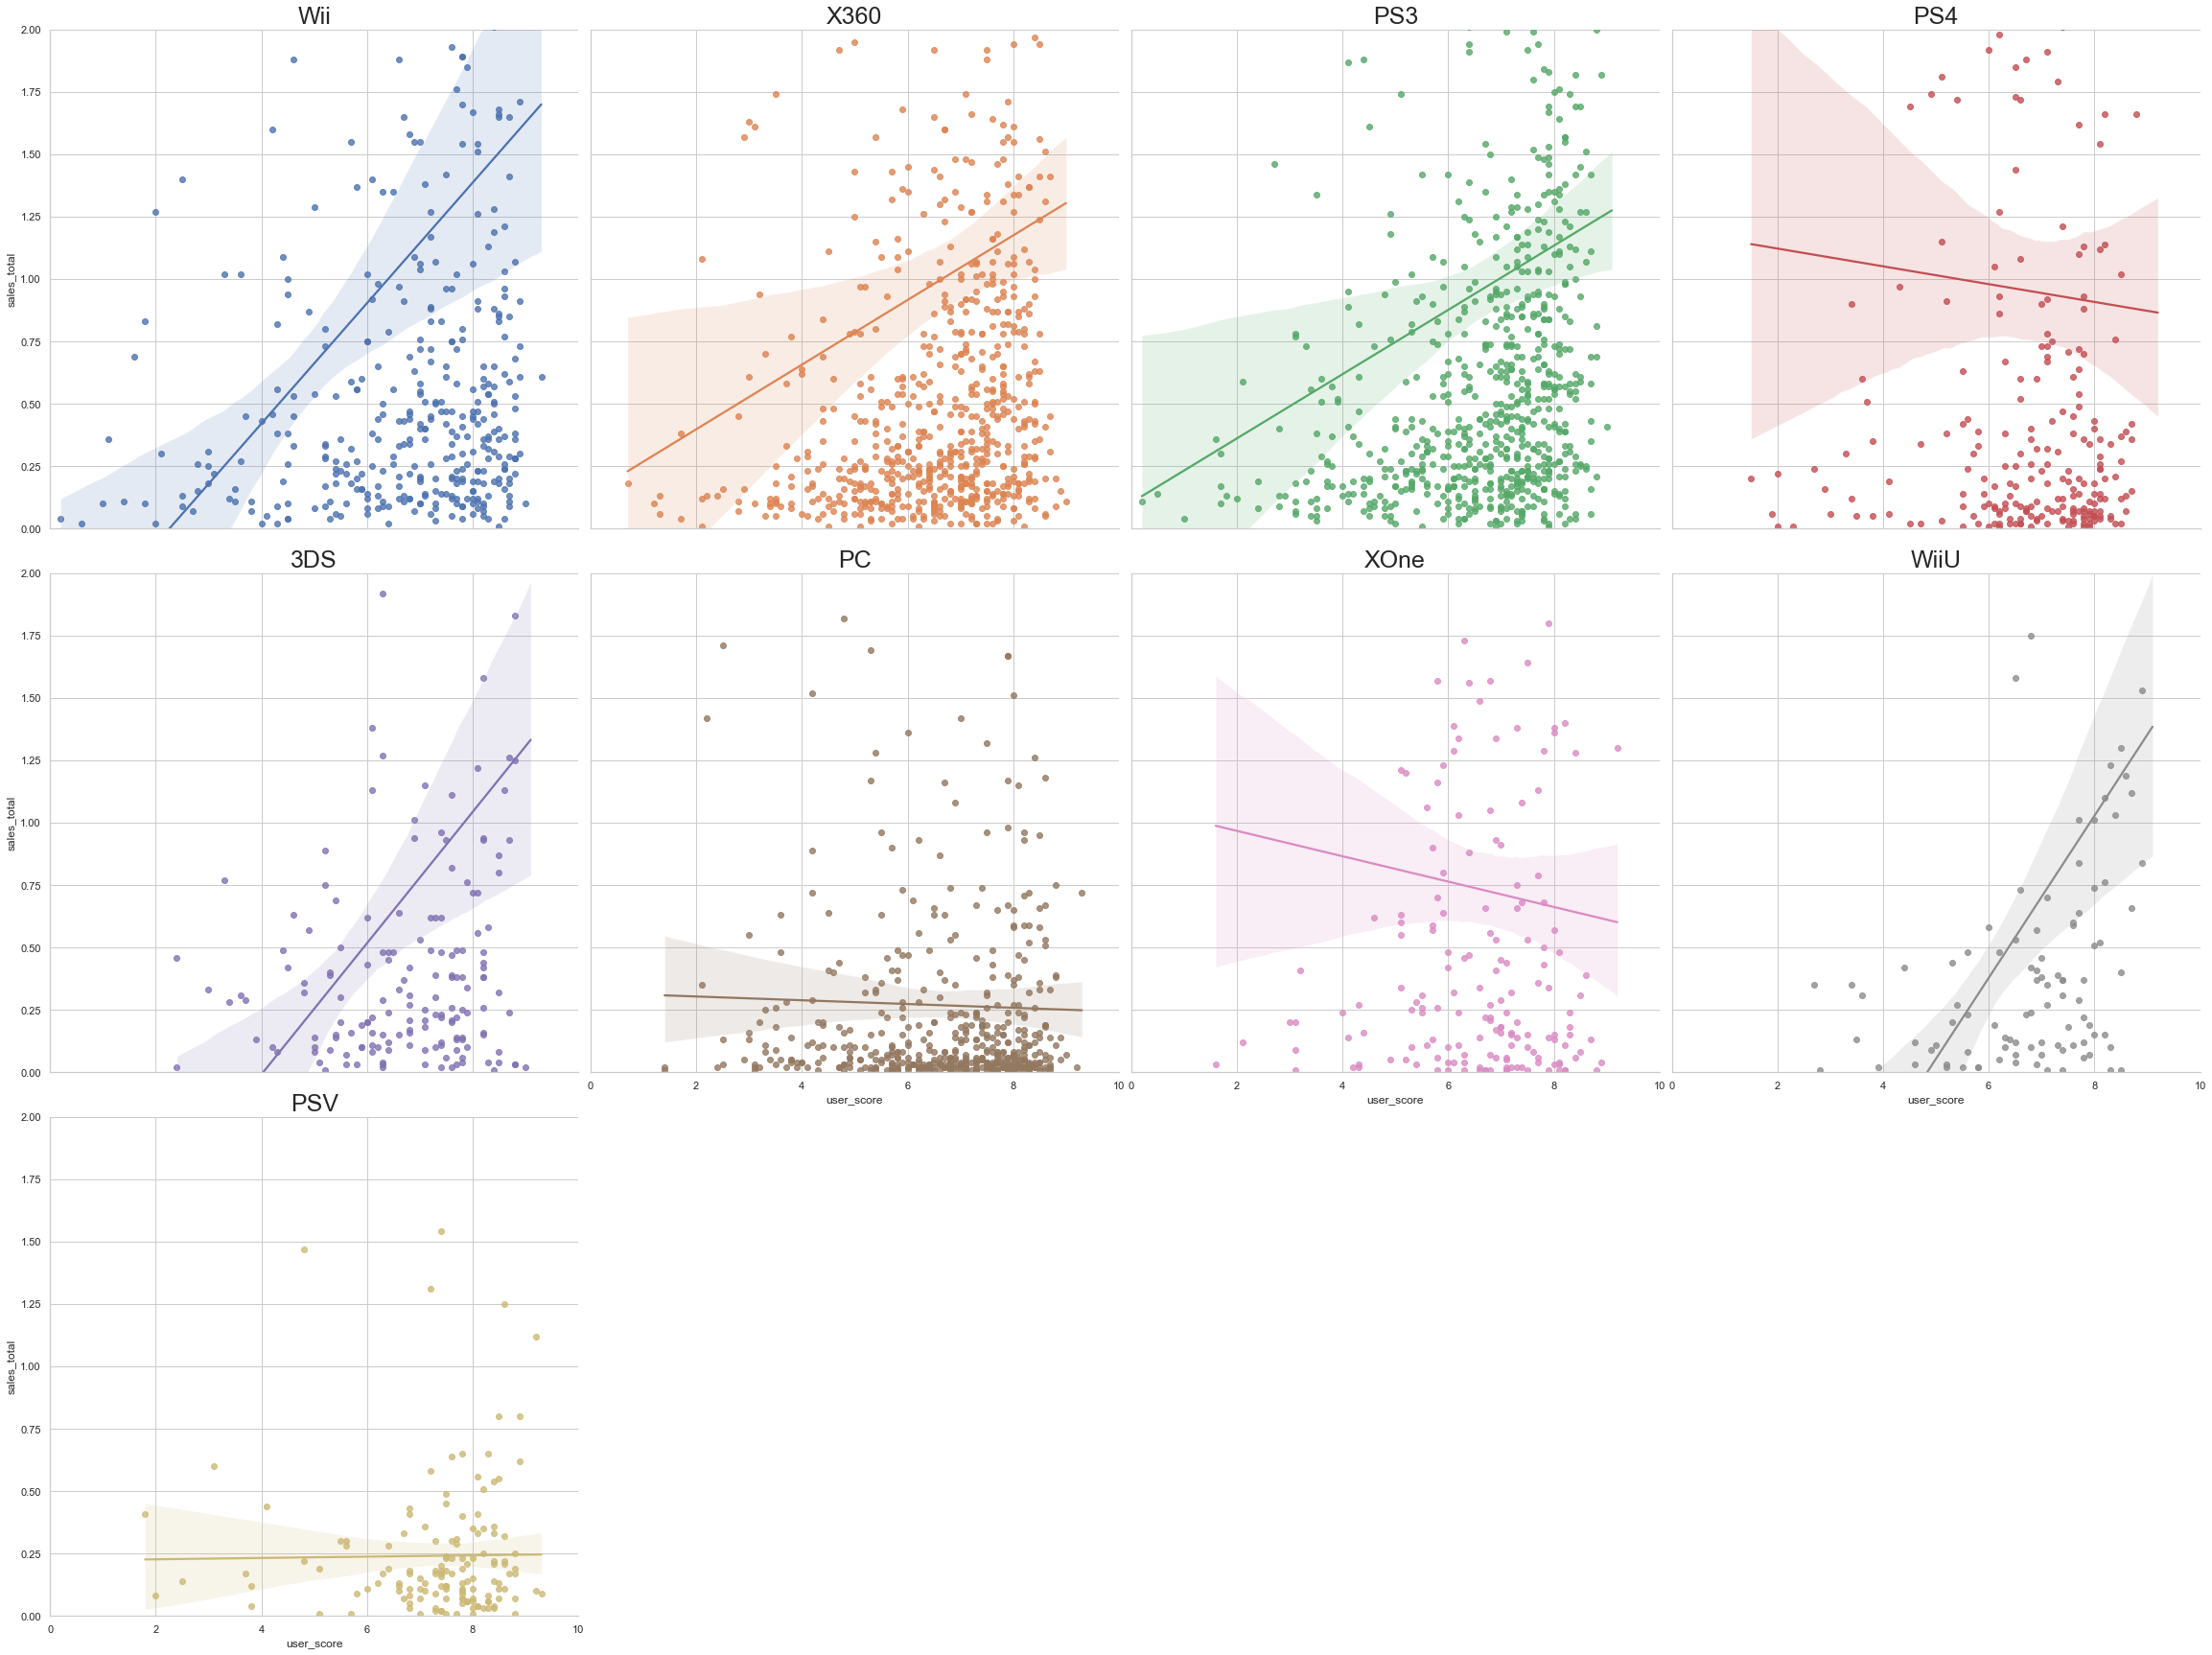

In [47]:
xog = sns.lmplot(data=actual_games, x='user_score', y='sales_total', col='platform',
                 hue='platform', col_wrap=4, height=8).set(xlim=(0,10),ylim=(0,2)).set_titles("{col_name}", size=25)

- По графикам видно, что пользователи изучаемымых платформ обращают внимание на оценку пользователей очень по разному. Зависимость от платформы к платформе изменяется по разному. Забавно отметить обратные зависимости, но это скорее отсутствие влияния оценки пользователей на решение покупателей.

In [48]:
actual_games.loc[:,['sales_total', 'critic_score', 'user_score']].corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.253179,0.085442
critic_score,0.253179,1.000000,0.401474
user_score,0.085442,0.401474,1.000000


По матрице корреляции можно отметить две зависимости:
- небольшое влияние оценки критиков на цену (25%);
- влияние оценки критиков на оценку пользователей (40%).

***Выделяются ли жанры с высокими и низкими продажами?***

Построим распределение жанров для каждой платформы:

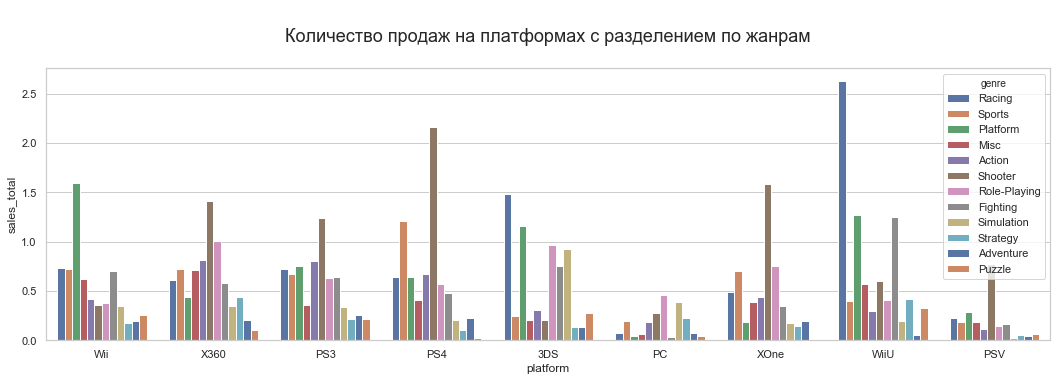

In [49]:
gts = sns.barplot(x="platform", y="sales_total", hue='genre',
             data=actual_games, ci=None, palette='deep')
gts.set_title('\nКоличество продаж на платформах с разделением по жанрам\n', fontsize=18)
gts.figure.set_size_inches(18, 5)

Здесь важную роль играет для какого жанра лучше подходят возможности какой игровой платформы.

Но в целом визуально можно отметить жанры, которые выделяются на графике сильнее, это:
- Racing
- Shooter
- Platform
- Sports
- Role-Playing

Теперь построим диаграмму для совокупности платформ:

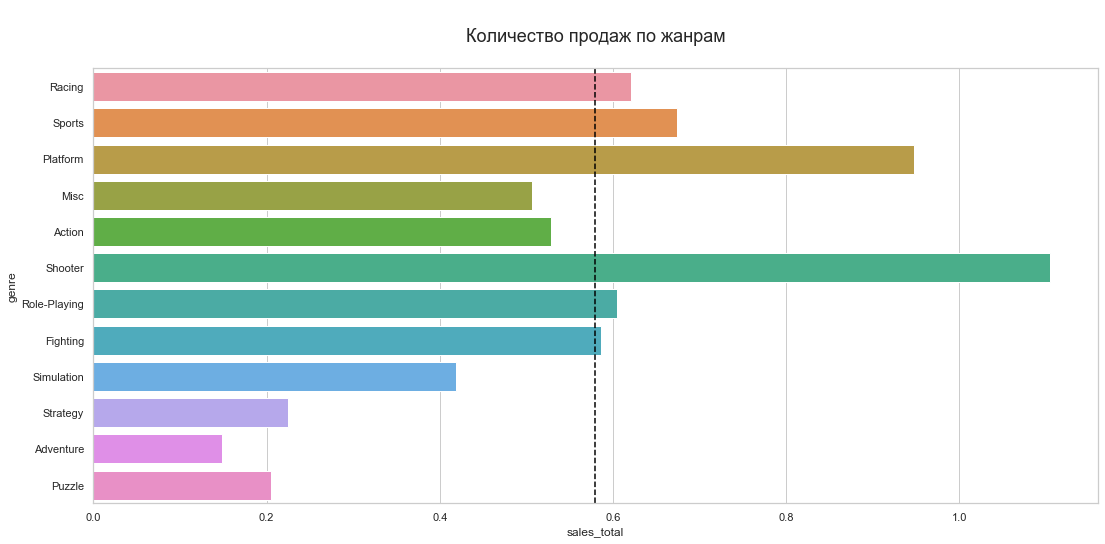

In [50]:
sg = sns.barplot(x='sales_total', y='genre', data=actual_games, ci=None)
sg.set_title('\nКоличество продаж по жанрам\n', fontsize=18)
plt.axvline(actual_games['sales_total'].mean(), color ='black', ls='--')
sg.figure.set_size_inches(18, 8)

На графике суммарных продаж по всем платформам можно отметить немного другой порядок жанров, это:
- Shooter
- Platform
- Sports
- Racing
- Role-Playing
- Fighting

### 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)

In [51]:
pop_platform = actual_games.pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()

In [52]:
def top5_platform(region, title):
    return pop_platform.loc[:,['platform', region]].sort_values(by=region, ascending=False).head().style.hide_index().set_caption(title)

In [53]:
top5_platform('na_sales','ТОП-5 платформ в Северной Америке')

platform,na_sales
X360,490.690000
PS3,349.130000
Wii,332.870000
PS4,108.740000
XOne,93.120000


Северная Америка предпочитает X360 (предыдущее поколение от Microsoft). Очевидно, что на выбор повлияла стоимость самой приставки (по сравнению с конкурентами) и поддержка большого количества игр. однако видно что среди консолей нового поколения Microsoft доверие теряет и платформа PS4 от Sony показывает продажи лучше чем Microsoft XOne.

In [54]:
top5_platform('eu_sales','ТОП-5 платформ в Европе')

platform,eu_sales
PS3,293.730000
X360,234.880000
Wii,170.740000
PS4,141.090000
PC,92.170000


Европейцы отдают предпочтения продукции Sony, хотя приставка Miscrosoft X360 заняла второе место в топе (предположительно из-за доступности и большого количество представленных игр). А вот XOne вообще не вошла в топ. Отдельно отметим PC на пятом месте топа: предоположительно здесь играет роль консервативность и экономность Европейцев (отец и мать делают работу на компьютере, а сын или дочь играют на нем же).

In [55]:
top5_platform('jp_sales','ТОП-5 платформ в Японии')

platform,jp_sales
3DS,100.620000
PS3,74.110000
Wii,47.010000
PSV,21.840000
PS4,15.960000


Японцы отдают предпочтение портативной 3DS от Nintendo - здесь, как представляется, играет роль темп жизни, желание мобильности с одной стороны и особые предпочтения по жанрам, которые хорошо реализованы как раз на портативных платформах. Эти умозаключения подтверждают присутствие портативной платформы Sony PS Vita.

Нужно отдельно отметить что платформа Wii занимает стабильное 3-е место во всех трех наших топах.

- Самые популярные жанры (топ-5)

In [56]:
pop_genre = actual_games.pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()

In [57]:
def top5_genre(region, title):
    return pop_genre.loc[:,['genre', region]].sort_values(by=region, ascending=False).head().style.hide_index().set_caption(title)

In [58]:
top5_genre('na_sales', 'ТОП-5 жанров в Северной Америке')

genre,na_sales
Action,376.760000
Shooter,305.310000
Sports,250.860000
Misc,175.410000
Role-Playing,121.870000


In [59]:
top5_genre('eu_sales', 'ТОП-5 жанров в Европе')

genre,eu_sales
Action,283.460000
Shooter,206.470000
Sports,169.020000
Misc,89.470000
Racing,84.490000


Америка и Европа сходятся в предпочтениях по жанрам в первых 4-х позициях - это "Экшн", "Стрелялки", cпортивные симуляторы и симуляторы "жизни" (например, "The Sims").

Различаются эти регионы последним пунктом: Американцы больше предпочитают RPG (Role-Playing Game - персонаж отправляется в путь разгадывать загадки, бороться, собирать коллекции и тд.), а Европейцы больше предпочитают Racing (гоночные симуляторы).

In [60]:
top5_genre('jp_sales', 'ТОП-5 жанров в Японии')

genre,jp_sales
Role-Playing,77.290000
Action,69.850000
Sports,20.970000
Misc,20.800000
Platform,20.560000


Предпочтения в Японии отличны от Америки и Европы. Можно разделить предпочтения на две подгруппы. **RPG и Экшн** (похоже играет роль особенности менталитета - Японцы кажутся более замкнутыми в себе и больше предпочитают проводить времени в виртуальных мирах, представляя себя любимыми персонажами). **Спортивные симуляторы, симуляторы "жизни", платформеры** (один из флагманских жанров любимой консоли 3DS).

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

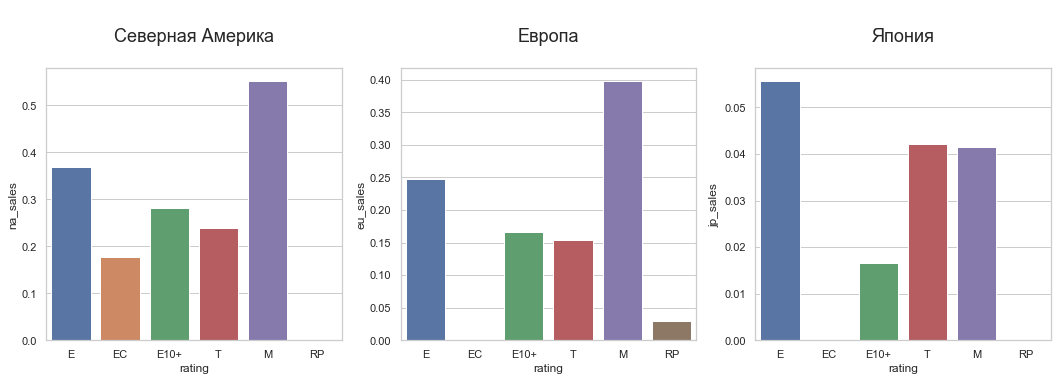

In [61]:
fig,axs = plt.subplots(1,3)
for ax,col,title in zip(axs,["na_sales", "eu_sales", "jp_sales"], ['\nСеверная Америка\n', '\nЕвропа\n', '\nЯпония\n']):
    sns.barplot(x="rating",order=['E', 'EC', 'E10+', 'T', 'M', 'RP'], y=col, ci = None, data=actual_games, ax=ax).set_title(title, size=18).figure.set_size_inches(18, 5)

- Е - Everyone
- EC - Early Childhood (для дошкольной аудитории, был отменен в 2018 году)
- E10+ - Everyone 10+ (существует с марта 2005 года)
- T - Teen (подходит для детей от 13 лет и старше)
- M - Mature 17+
- RP - Rating Pending (встречается в промоматериалах для игр, которые еще не получили итоговый рейтинг)

Исходя из диаграмм продаж по каждой возрастной категории можно сделать вывод, что в Северной Америке и Европе продажи распределены примерно в одинаковых пропорциях. Больше всего игр продается в категории "17+". В Японии же преобладает по продажам категория "Игры для всех".

Примечательно что в Америке и Европе предпочтения по остальным возрастам не очень сильно разбросаны, а вот в Японии мало покупают игры для детей возраста "10+", а вот категории "13+" и "17+" пользуется уверенным спросом.

### 5. Проверка гипотез

#### "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

*Определим гипотезы:*
- $H_{0}=$"средние пользовательские рейтинги платформ Xbox One и PC равны"
- $H_{A}=$"средние пользовательские рейтинги платформ Xbox One и PC не равны"


In [62]:
xone_score = actual_games[actual_games['platform'] == 'XOne']['user_score'].array.dropna()
pc_score = actual_games[actual_games['platform'] == 'PC']['user_score'].array.dropna()

Применим метод гипотезы о равенстве средних двух генеральных совокупностей:

In [63]:
alpha = .05
result = st.ttest_ind(xone_score, pc_score)
print('p-значение:\t', result.pvalue)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')

p-значение:	 0.1295458611061516
Нулевую гипотезу отвергнуть не получилось


Данные не свидетельствуют против нулевой гипотезы. То что средние пользовательские рейтинги платформ Xbox One и PC одинаковые опровергнуть не получилось. 

#### "Средние пользовательские рейтинги жанров Action и Sports разные".

*Определим гипотезы:*
- $H_{0}=$"средние пользовательские рейтинги жанров Action и Sports равны"
- $H_{A}=$"средние пользовательские рейтинги платформ жанров Action и Sports не равны"


In [64]:
action_score = actual_games[actual_games['genre'] == 'Action']['user_score'].array.dropna()
sports_score = actual_games[actual_games['genre'] == 'Sports']['user_score'].array.dropna()

Применим метод гипотезы о равенстве средних двух генеральных совокупностей:

In [65]:
alpha = .05
result = st.ttest_ind(action_score, sports_score)
print('p-значение:\t', result.pvalue)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')

p-значение:	 3.531410425335665e-18
Отвергаем нулевую гипотезу


Результаты говорят о том, что нулевая гипотеза не состоятельна. То что средние пользовательские рейтинги жанров Action и Sports разные опровергнуть не получилось.

### 6. Общий вывод

- В среднем игровая латформа существует на рынке около 8 лет. Платформы в разные годы набирали обороты, а затем теряли актуальность и игры для них совсем переставали выпускаться. За актуальный период при подобных исследованиях стоит брать платформы, имеющие актуальность(существующие в продаже) на сегодняшний день.
- В целом на 2016 год наблюдается упадок по продажам на всех платформах. В лидерах плаформы PS4, XOne, WiiU, но при этом резко снижаются. Упав к 2015 снова набирает обороты и стремится в лидеры платформа 3DS. PC стабильно качается то в большую то в меньшую сторону и периодически то обретает то теряет к себе интерес. Однако это платформа существует на рынке уже 31 год (исходя из датасета), это определяется абсолютной мультизадачностью системы (устоявшаяся группа поклонников PC, это, предположительно, люди, которые используют компьютер для учебы, работы и его же используют как платформу для игр - бюджетно, поэтому и спрос долгосрочный, но стабильно не высокий). Сейчас наблюдается очередное ослабление интереса к играм на PC. В самом низу платформа PSV, которая испытывает легкое оживление к 2016 году, но в целом, согласно предположительному циклу в 8 лет, платформа предположительно потеряет большинство поклонников к 2019 году.
- Лидерами по разбросу цен являются конкурентные пары X360 - PS3 и XOne - PS4. При этом удивительно, что пара предыдущего поколения (X360-PS3) по средним показателям превосходят пару нынешнего поколения (XOne - PS4). Так же заметна тендеция что по средним показателям платформы от Microsoft (X360 и XOne) немного первышают продукты Sony (PS3 и PS4). Так же стоит обратить внимание на Nintendo (Wii и WiiU) - они отличаются чуть более узким разбросом цен. По срединному показателю консоль WiiU совсем не уступает XOne, что подтверждает факт, что Nintendo является сейчас серьезным конкурентом Microsoft и Sony.
- Пользователи изученных актуальных платформ обращают внимание на оценку критиков. Отмечается прямая зависимость: чем выше оценка критиков тем больше игру покупают. Совершенно не однозначная ситуация с реакцией покупателей на оценки пользователей. Зависимость от платформы к платформе разная. Можно сделать вывод, что на оценки пользователей должного внимания обращать не стоит. Отдельно стоит отметить что оценка критиков и пользователей взаимозависима. Это поддерживает теорию о том, что мнение критиков влияет на продажи.
- При выборе популярных жанров в целом стоит обращать внимание на такие жанры как: Shooter, Racing, Platform, Sports, Role-Playing, Fighting. На популярность жанра частично влияют возможности той или иной платформы (удобство устройств управления, особенности аппаратного и прогаммного обеспечения).

Портрет пользователей северо-американцев и европейцев:

- Северная Америка предпочитает X360 (предыдущее поколение от Microsoft). Очевидно, что на выбор повлияла стоимость самой приставки (по сравнению с конкурентами) и поддержка большого количества игр. однако видно что среди консолей нового поколения Microsoft доверие теряет и платформа PS4 от Sony показывает продажи лучше чем Microsoft XOne.
- Европейцы отдают предпочтения продукции Sony, хотя приставка Miscrosoft X360 заняла второе место в топе (предположительно из-за доступности и большого количество представленных игр). А вот XOne вообще не вошла в топ. Отдельно отметим PC на пятом месте топа: предоположительно здесь играет роль консервативность и экономность Европейцев (отец и мать делают работу на компьютере, а сын или дочь играют на нем же).
- Америка и Европа сходятся в предпочтениях по жанрам в первых 4-х позициях - это "Экшн", "Стрелялки", cпортивные симуляторы и симуляторы "жизни" (например, "The Sims").
- Американцы больше предпочитают RPG (Role-Playing Game - персонаж отправляется в путь разгадывать загадки, бороться, собирать коллекции и тд.), а Европейцы больше предпочитают Racing (гоночные симуляторы).
- По возрастному рейтингу в Северной Америке и Европе продажи распределены примерно в одинаковых пропорциях. Больше всего игр продается в категории "17+". Предпочтения по остальным категориям не очень сильно разбросаны.

Портрет пользователей японцев:

- Японцы отдают предпочтение портативной консоли 3DS от Nintendo - здесь, как представляется, играет роль темп жизни, желание мобильности с одной стороны и особые предпочтения по жанрам, которые хорошо реализованы как раз на портативных платформах. Эти умозаключения подтверждают присутствие портативной платформы Sony PS Vita в рейтинге.
- По жанрам можно разделить предпочтения на две подгруппы. *RPG и Экшн* (похоже играет роль особенности менталитета - Японцы кажутся более замкнутыми в себе и больше предпочитают проводить времени в виртуальных мирах, представляя себя любимыми персонажами). *Спортивные симуляторы, симуляторы "жизни", платформеры* (один из флагманских жанров любимой консоли 3DS).
- По возрастному рейтингу в Японии преобладает по продажам категория "Игры для всех". Здесь мало покупают игры для детей возраста "10+", а вот категории "13+" и "17+" пользуется уверенным спросом.

Стоит отметить что платформа Wii занимает стабильное 3-е место во всех трех регионах. Это можно считать неким средним беспроигрышным вариантом. Похоже в любом регионе найдутся покупатели для этого продукта.

Проверка гипотез:
- Гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые опровергнуть не получилось. 
- Гипотезу что средние пользовательские рейтинги жанров Action и Sports разные опровергнуть не получилось.